# Project 2 Continuous Control
## Running the DDPG Agent against Reacher Environment


In [12]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch
from train_ddpg_headless import init_environment
from ddpg_agent import Agent
import matplotlib.pyplot as plt


In [2]:
hyperparameters = {
    'batch_size': 256,
    'buffer_size': 100000,
    'gamma': 0.99,
    'lin_full_con_01': 128,
    'lin_full_con_02': 128,
    'lr_actor': 0.001,
    'lr_critic': 0.001,
    'noise_scalar': 0.25,
    'tau': 0.001,
    'weight_decay': 0
}

In [3]:
agent, env, brain_name = init_environment(hyperparameters=hyperparameters)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


##Reacher Environment##

# Environment Details
- Number of Agents: 1
- Size of Action (Continuous): 4 
- Number of state variables: 33

# Hyper Parameters
{'batch_size': 256,
 'buffer_size': 100000,
 'gamma': 0.99,
 'lin_full_con_01': 128,
 'lin_full_con_02': 128,
 'lr_actor': 0.001,
 'lr_critic': 0.001,
 'noise_scalar': 0.25,
 'tau': 0.001,
 'weight_decay': 0}
    


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
env_info = env.reset(train_mode=True)[brain_name]
brain = env.brains[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)

In [ ]:
timesteps = 500
score = []                                             # initialize the score (for each agent)
for t in range(1, timesteps):
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    #actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    score += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step

print('Total score (averaged over agents) this amount of timesteps: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. Run with the trained agent


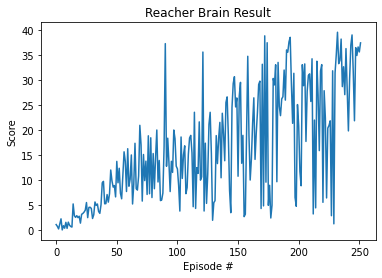

In [14]:
with open("final_scores.txt") as f:
    str_scores = f.readlines()

float_scores = [float(score.strip()) for score in scores] 

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(float_scores)), float_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("Reacher Brain Result")
plt.show()

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("BananaBrain Result with \n eps_decay=0.990\n 3-Layer Linear QNetwork")
plt.show()

In [5]:
agent.load_checkpoints()
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations

In [ ]:
timesteps = 500
score = []
for t in range(1, timesteps):
    actions = agent.act(states)
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations          
    rewards = env_info.rewards                         
    dones = env_info.local_done                         
    agent.step(states, actions, rewards, next_states, dones, t)
    states = next_states 


/home/user/py36unity/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
